<h1>EP1 MODELAGEM</h1>

<h5>Nomes:</h5>

- Davi de Menezes Pereira, 11221988
- Gustavo de Medeiros Carlos, 11276298
- Lucas Irineu Rebouças Guimarães, 11221713
- Luciano Rodrigues Saraiva Leão, 11221817
- Luiza Barros Reis Soezima, 11221842
- Marcos Siolin Martins, 11221709



Não esquecer de utilizar a notação descrita no Enunciado embora claro q não faça o menor sentido inclusive o Gustavo não quis usar para não ficar confuso no caso do $x_0$ que ficaria ${x_0}_s$ ou ${x_s}_0$, enfim algo muito feio e ridículo logo decidi não fazer msm pq nada a ver.

<h4>Imports</h4>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
import pandas as pd

<h2>Movimento retilíneo uniforme e uniformemente variado</h2>

Nesses dois movimentos a aceleração é constante e chamaremos ela de $a$. No movimento retilínio uniforme temos que $a = 0$.

<h4>Solução analítica sem atrito</h4>

Resolvendo a equação diferencial,

\begin{align*}
    \ddot{x}(t) &= a \\
    \int \ddot{x}(t) dt &= \int a dt \\
    \dot{x}(t) &= at + v_0 \\
    \int \dot{x}(t) dt &= \int at + v_0 dt \\
    x(t) &= \frac{a}{2}t^2 + v_0t + x_0,
\end{align*}

obtemos a equação analítica da posição em relação ao tempo do movimento retilínio uniformemente variado.

A equação do movimento retilínio uniforme é

\begin{align*}
    x(t) &= v_0t + x_0.
\end{align*}

In [ ]:
def proxXA(t, params):
    return params[0] * t * t / 2 + params[1] * t + params[2]

def proxVA(t, params):
    return params[0] * t + params[1]

<h4>Solução de Euler sem atrito</h4>

Na solução de Euler, aproximamos a integral pela série de Taylor. Sabendo que $\ddot{x}(t) = a$, vemos que

\begin{align*}
    \ddot{x}(t) &= \frac{\dot{x}(t + \Delta t) - \dot{x}(t)}{\Delta t} \\
    \ddot{x}(t)\Delta t &= \dot{x}(t + \Delta t) - \dot{x}(t) \\
    \dot{x}(t + \Delta t) &= \dot{x}(t) + \ddot{x}(t)\Delta t \\
    v(t + \Delta t) &= v(t) + a\Delta t
\end{align*}

e que

\begin{align*}
    \dot{x}(t) &= \frac{x(t + \Delta t) - x(t)}{\Delta t} \\
    \dot{x}(t)\Delta t &= x(t + \Delta t) - x(t) \\
    x(t + \Delta t) &= x(t) + \dot{x}(t)\Delta t \\
    x(t + \Delta t) &= x(t) + v(t)\Delta t.
\end{align*}

In [ ]:
def proxVE(v, t, dt, params):
    return v + params[0] * dt

def proxXE(x, v, dt):
    return x + v * dt

<h4>Comparação das duas implementações e diferenças encontradas</h4>

Na versão analítica podemos obter exatamente a velocidade e a posição quando quisermos, de maneira independente, já na versão de Euler, precisamos calcular a velocidade primeiro para depois calcular a posição em cada intervalo. Como a velocidade é uma reta por a aceleração ser constante, não cometemos erro ao aproximar pela série de Taylor de ordem 1. O mesmo não acontece em relação a posição, e o erro vai acumulando com o tempo, como é possível ver no gráfico.

<h4>Animação</h4>

O primeiro gráfico representa a posição em relação ao tempo, o segundo representa a velocidade em relação ao tempo. Em azul está o movimento pela implementação analítica e em laranja tracejado está o movimento pela implementação de Euler. Os parâmetros da utilizados de exemplo são
\begin{align*}
    a &= 2 \\
    v_0 &= 5 \\
    x_0 &= 10.
\end{align*}

In [ ]:
params = [2, 5, 10] # [a, v, x]
t = 0 # tempo atual
tf = 10 # tempo final
dt = 1 # intervalo de tempo
v = params[1] # velocidade atual
x = params[2] # posição atual

valoresXA = []
valoresVA = []
valoresXE = []
valoresVE = []

while t <= tf:
    valoresVA.append(proxVA(t, params))
    valoresXA.append(proxXA(t, params))
    valoresVE.append(v)
    valoresXE.append(x)
    v = proxVE(v, t, dt, params)
    x = proxXE(x, v, dt)
    t += dt

# grafico de posição
plt.plot(valoresXA, label='Analítico')
plt.plot(valoresXE, label='Euler', linestyle=':', marker='D')
plt.title('Posição')
plt.xlabel('tempo')
plt.ylabel('posição')
plt.show()

# grafico de velocidade
plt.plot(valoresVA, label='Analítico')
plt.plot(valoresVE, label='Euler', linestyle=':', marker='D')
plt.title('Velocidade')
plt.xlabel('tempo')
plt.ylabel('velocidade')
plt.show()

<h4>Animação</h4>

Animação de um movimento acelerado pela implementação analítica.

In [ ]:
fig = plt.figure()
ax = plt.axes(xlim=(0, proxXA(tf, params)), ylim=(-1, 1))
line, = ax.plot([], [], 'D', lw=2)
plt.title('Animação')
plt.xlabel('posição')
plt.yticks([])
plt.close()


def init():
    line.set_data([], [])
    return line,

framerate = 20

def animate(i):
    ti = i/framerate
    x = proxXA(ti, params)
    y = 0
    line.set_data(x, y)
    return line,

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=tf*framerate, interval=1000/framerate, blit=True)
rc('animation', html='jshtml')

anim









---

---

<h2>Queda Livre</h2>



<h4>Solução analítica</h4>

No movimento de queda livre com resistência do ar para velocidades baixas consideramos a resistência do ar como sendo "-kv". Portanto, temos:

\begin{align*}
    \ddot{y}(t) &= g - \frac{k\dot{y}(t)}{m} \\
    \frac{\ddot{y}(t)}{\dot{y}(t) + \frac{mg}{k}} &= -\frac{k}{m}\\
     \int_0^v \frac{\ddot{y}(t)}{\dot{y}(t) + \frac{mg}{k}} &= \int_0^t -\frac{k}{m}dt\\
    -\ln{\frac{1 + \frac{kv}{mg}}{1 + \frac{k.0}{mg}}} &= \frac{kt}{m}\\
    v &= - \frac{mg}{k}(1 - e^{-\frac{kt}{m}})\\
\end{align*}

Agora que achamos a equação horária da velocidade, integramos mais uma vez para achar a equação horária do y:

\begin{align*}
    \int \dot{y}(t) &= \int_0^t - \frac{mg}{k}(1 - e^{-\frac{kt}{m}})dt\\
    y(t) &= - \frac{mgt}{k} + \frac{mg}{k}\int_0^t e^{-\frac{kt}{m}}dt\\
    y(t) &= - \frac{mgt}{k} - \frac{m²g}{k²} (e^{-\frac{kt}{m}} - 1)\\
    y(t) &= - \frac{mgt}{k} - \frac{m^{2}g}{k^{2}}e^{-\frac{kt}{m}} + \frac{m²g}{k²} \\
\end{align*}

Assim, obtemos a equação analítica da posição em relação ao tempo do movimento queda livre.

A equação do movimento queda livre é:

\begin{align*}
   y(t) &= y_0 - \frac{mgt}{k} - \frac{m^{2}g}{k^{2}}e^{-\frac{kt}{m}} + \frac{m²g}{k²} \\\\
\end{align*}

In [ ]:
# params[0]: a ; params[1]: v; params[2]: x; params[3]: m ???
def QLproxYA(t, m, g, k, params):
    expo = math.exp(-(k*t)/params[3])
    return -(m*g*t)/k - m*m*g*expo/(k*k) + (m*m*g/(k*k)

def QLproxVA(t, g, k, params):
    expo = math.exp(-(k*t)/params[3])
    return (params[3]*g*expo)/k - (params[3]*g)/k

Na solução de Euler, aproximamos a integral pela série de Taylor. Sabendo que $\ddot{x}(t) = a$, vemos que

\begin{align*}
    \ddot{x}(t) &= \frac{\dot{x}(t + \Delta t) - \dot{x}(t)}{\Delta t} \\
    \ddot{x}(t)\Delta t &= \dot{x}(t + \Delta t) - \dot{x}(t) \\
    \dot{x}(t + \Delta t) &= \dot{x}(t) + \ddot{x}(t)\Delta t \\
    v(t + \Delta t) &= v(t) + a\Delta t
\end{align*}

e que

\begin{align*}
    \dot{x}(t) &= \frac{x(t + \Delta t) - x(t)}{\Delta t} \\
    \dot{x}(t)\Delta t &= x(t + \Delta t) - x(t) \\
    x(t + \Delta t) &= x(t) + \dot{x}(t)\Delta t \\
    x(t + \Delta t) &= x(t) + v(t)\Delta t.
\end{align*}

In [ ]:
def proxVE(v, t, dt, params):
    return v - params[0] * dt

def proxYE(y, v, dt):
    return y + v * dt

<h4>Comparação das duas implementações e diferenças encontradas</h4>

Explicação aqui

<h4>Animação</h4>

In [ ]:
#

t = 0
tf = 10
params = [-10, -5, 200]
v = params[1]
y = params[2]
dt = 1

valoresYA = []
valoresVA = []
valoresYE = []
valoresVE = []

while t <= tf:
    valoresVA.append(proxVA(t, params))
    valoresYA.append(proxYA(t, params))
    valoresVE.append(v)
    valoresYE.append(y)
    v = proxVE(v, t, dt, params)
    y = proxYE(y, v, dt)
    t += dt

#print(valoresYA)

#plt.plot(valoresXA, label='Analítico')
#plt.plot(valoresXE, label='Euler', linestyle=':', marker='D')
#plt.title('Posição')
#plt.xlabel('tempo')
#plt.ylabel('posição')
#plt.show()

#plt.plot(valoresVA, label='Analítico')
#plt.plot(valoresVE, label='Euler', linestyle=':', marker='D')
#plt.title('Velocidade')
#plt.xlabel('tempo')
#plt.ylabel('velocidade')
#plt.show()

fig = plt.figure()
ax = plt.axes(xlim=(-1, 1), ylim=(proxYA(tf, params), params[2]))
line, = ax.plot([], [], 'D', lw=2)
plt.title('Animação')
plt.ylabel('posição')
plt.xticks([])
plt.close()

def init():
    line.set_data([], [])
    return line,

framerate = 20

def animate(i):
    ti = i/framerate
    y = proxYA(ti, params)
    x = 0
    line.set_data(x, y)
    return line,

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=tf*framerate, interval=1000/framerate, blit=True)
rc('animation', html='jshtml')

anim



---

---

<h2>Pêndulo</h2>



<h4>Solução analítica</h4>

![]( 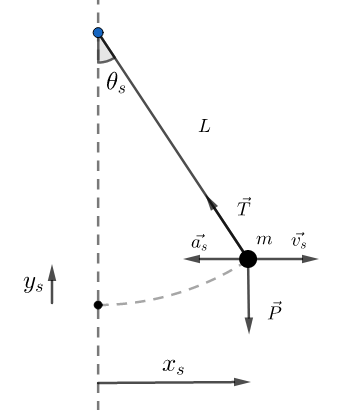)

Para $\theta$  pequeno podemos dizer que $a_s$ e $v_s$ são horizontais e portanto há equilíbrio na vertical.
$$  T_y = m g ~~ \rightarrow ~~ T = mg ~sec~ \theta_s $$

Calculando agora a aceleração no eixo horizontal e usando a aproximação $tg ~ \theta_s ~ \approx ~\theta_s \approx ~ \frac{x_s}{L}$:
$$ ma_s = - T_x ~~ \rightarrow ~~ m a_s = - mg ~ tg ~ \theta_s   $$
$$\rightarrow a_s + \frac{g}{L} ~x_s = 0$$

Resolvendo essa equação diferencial obtemos que:
$$ x_s(t) ~ = ~ A ~cos \left( \omega t ~+~ \phi_0  \right) ~~~ com ~~~ \omega ~ = ~\sqrt\frac{g}{L}  ~~ e ~~ A \ll L   $$

Para achar o $~y_s(t)$  podemos ver na geometria que $(L-y_s)^2 + x_s^2 ~ = L^2~$, então:
$$ y_s(t) ~ = ~ L ~-  ~\sqrt{L^2 -  (~A ~cos \left( \omega t ~+~ \phi_0  \right)~)^2}    $$

<h4>Solução de Euler sem atrito</h4>

Explicação aqui

<h4>Comparação das duas implementações e diferenças encontradas</h4>

Explicação aqui

<h4>Animação</h4>



---

---

<h2>Bloco em rampa</h2>



<h4>Solução analítica sem atrito</h4>

Explicação aqui

<h4>Solução de Euler sem atrito</h4>

Explicação aqui

<h4>Comparação das duas implementações e diferenças encontradas</h4>

Explicação aqui

<h4>Animação</h4>



---

---

<h2>Movimento Circular</h2>



<h4>Solução analítica sem atrito</h4>

Explicação aqui

<h4>Solução de Euler sem atrito</h4>

Explicação aqui

<h4>Comparação das duas implementações e diferenças encontradas</h4>

Explicação aqui

<h4>Animação</h4>